In [1]:
%load_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import typing

In [3]:
%autoreload
from src.xes.load_xes import load_raw_xes
from src.xes.xes_file import XesFile
from src.xes.print_xes_info import PrintXesInfo

In [9]:
xes = XesFile.read("data/BPI_Challenge_2013_closed_problems.xes")
PrintXesInfo.s_print_info(xes)

Traces: 1487, events: 6660
Events: Average: 4.478816408876933, Min: 1, Max: 35

11 unique attributes in events:
            Attribute  Count Presence
            org:group   6659   100.0%
     resource country   6659   100.0%
 organization country   6659   100.0%
         org:resource   6659   100.0%
organization involved   6659   100.0%
             org:role   4581    68.8%
         concept:name   6659   100.0%
               impact   6659   100.0%
              product   6659   100.0%
 lifecycle:transition   6659   100.0%
       time:timestamp   6659   100.0%

"time:timestamp": 100.0% presence
average:      2011-11-01 09:52:43.071171328+00:00
min:          2006-01-11 14:49:42+00:00
max:          2012-05-31 21:49:06+00:00
average span: 178 days 21:14:13.334229992

"concept:name": 100.0% presence, 4 different values, top 4:
Accepted (4207), Completed (1568), Queued (875), Unmatched (10)

"lifecycle:transition": 100.0% presence, 7 different values, top 5:
In Progress (3066), Closed (156

In [16]:
xes.traces.index(max(xes.traces, key=lambda x: len(x.df)))

712

In [18]:
df = xes.traces[712].df
# df.describe()
df

,org:group,resource country,organization country,org:resource,organization involved,org:role,concept:name,impact,product,lifecycle:transition,time:timestamp
0,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,In Progress,2011-11-30 14:31:18+00:00
1,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,Wait,2011-11-30 16:01:49+00:00
2,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,In Progress,2011-12-01 07:46:45+00:00
3,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,Wait,2011-12-01 08:40:25+00:00
4,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,In Progress,2011-12-01 13:48:20+00:00
5,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,Wait,2011-12-01 13:57:08+00:00
6,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,In Progress,2011-12-07 08:31:50+00:00
7,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,Wait,2011-12-07 08:33:39+00:00
8,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,In Progress,2011-12-16 08:54:02+00:00
9,Org line A2,POLAND,in,Maciej,G34 3rd,A2_2,Accepted,Medium,PROD363,Wait,2011-12-16 10:32:18+00:00


In [12]:
# key = "lifecycle:transition"

# sequence_dict = {}
# scoped_df = df
# for index, series in scoped_df:
#     current_key = scoped_df
#     events_after_current = scoped_df.loc[index + 1:]

#     if len(events_after_current) == 0: continue

#     next_event = events_after_current.iloc[0]

# T_next_event_filter = \
#     typing.TypedDict({ "match": str | list[str] }) | \
#     typing.TypedDict({ "skip": str | list[str] }) | \
#     typing.Callable[[pd.DataFrame, pd.Series], pd.DataFrame]

def analyze_sequence(
        df: pd.DataFrame,
        sequence_keys: str | list[str] | typing.Callable[[pd.Series], str],
        next_event_filter = None
        ):

    generate_key = None
    if isinstance(sequence_keys, str):
        generate_key = lambda series: series.loc[sequence_keys]
    elif isinstance(sequence_keys, list):
        generate_key = lambda series: ', '.join([series.loc[key] for key in sequence_keys])
    else:
        generate_key = sequence_keys

    sequence_dict = {}
    for index, series in df.iterrows():
        current_key = generate_key(series)
        events_after_current = df.loc[index + 1:]
        # events_after_current = next_event_filter

        if len(events_after_current) == 0: continue

        next_event = events_after_current.iloc[0]
        next_event_key = generate_key(next_event)

        if not current_key in sequence_dict:
            sequence_dict[current_key] = {}

        if not next_event_key in sequence_dict[current_key]:
            sequence_dict[current_key][next_event_key] = 0

        sequence_dict[current_key][next_event_key] += 1

    return sequence_dict


In [13]:
def analyze_sequence_graph(df: pd.DataFrame, sequence_keys):
    sequence = analyze_sequence(df, sequence_keys)

    graph = nx.DiGraph()
    edges = [(source, destination, { "count": sequence[source][destination] })
            for source in sequence.keys()
            for destination in sequence[source].keys()]
    graph.add_edges_from(edges)

    return graph

In [34]:
seq = analyze_sequence(
    df=df,
    # df[df["concept:name"] == "Accepted"],
    sequence_keys=["concept:name", "lifecycle:transition"]
)
seq

{'Accepted, In Progress': {'Accepted, Wait': 11,
  'Accepted, In Progress': 2,
  'Queued, Awaiting Assignment': 3,
  'Completed, Closed': 1},
 'Accepted, Wait': {'Accepted, In Progress': 9,
  'Queued, Awaiting Assignment': 2},
 'Queued, Awaiting Assignment': {'Accepted, In Progress': 5,
  'Queued, Awaiting Assignment': 1}}

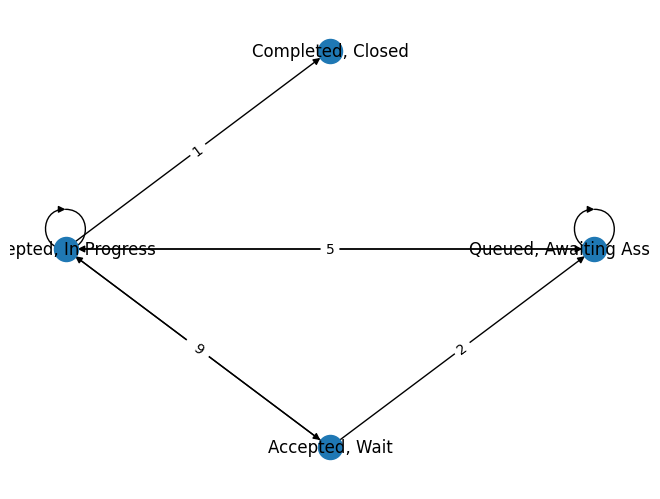

In [55]:
# DG = nx.DiGraph(seq)

DG = nx.DiGraph()

edges = [(source, destination, { "count": seq[source][destination] })
         for source in seq.keys()
         for destination in seq[source].keys()]
DG.add_edges_from(edges)

pos = nx.shell_layout(DG)
nx.draw(DG, pos, with_labels=True)
nx.draw_networkx_edge_labels(
    DG,
    pos,
    edge_labels={(n1, n2): data["count"]
                 for n1, n2, data in DG.edges(data=True)}
)

In [46]:
DG.edges[('Accepted, In Progress', 'Accepted, Wait')]

{}

In [51]:
DG.edges(data=True)

OutEdgeDataView([('Accepted, In Progress', 'Accepted, Wait', {'weight': 11}), ('Accepted, In Progress', 'Accepted, In Progress', {'weight': 2}), ('Accepted, In Progress', 'Queued, Awaiting Assignment', {'weight': 3}), ('Accepted, In Progress', 'Completed, Closed', {'weight': 1}), ('Accepted, Wait', 'Accepted, In Progress', {'weight': 9}), ('Accepted, Wait', 'Queued, Awaiting Assignment', {'weight': 2}), ('Queued, Awaiting Assignment', 'Accepted, In Progress', {'weight': 5}), ('Queued, Awaiting Assignment', 'Queued, Awaiting Assignment', {'weight': 1})])

In [5]:
xes2 = XesFile.read("data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_weekends.xes/activitylog_uci_detailed_weekends.xes")
df2 = xes2.traces[0].df
df2

,concept:name,lifecycle:transition,time:timestamp,watchingtv
0,Start,start,2012-11-17 01:26:35+00:00,Start
1,Start,complete,2012-11-17 01:26:35+00:00,Start
2,washing,start,2012-11-17 01:26:35+00:00,washing
3,washing,complete,2012-11-17 01:29:42+00:00,washing
4,toilet,start,2012-11-17 01:31:05+00:00,toilet
5,washing,start,2012-11-17 01:31:25+00:00,washing
6,toilet,complete,2012-11-17 01:32:00+00:00,toilet
7,washing,complete,2012-11-17 01:33:51+00:00,washing
8,sleeping,start,2012-11-17 01:34:31+00:00,sleeping
9,sleeping,complete,2012-11-17 08:46:36+00:00,sleeping


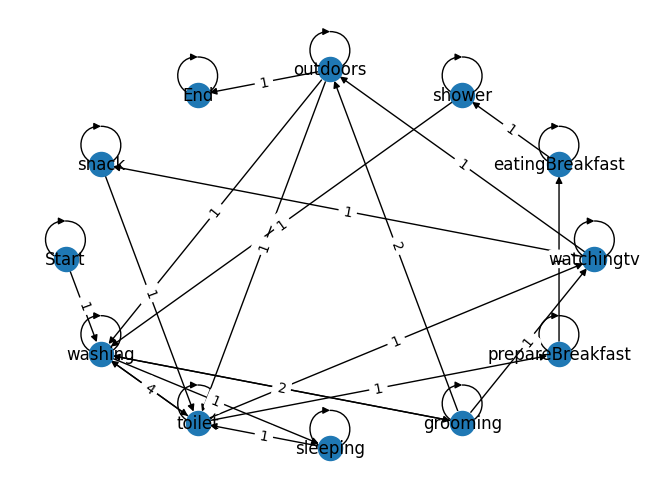

In [14]:
dg2 = analyze_sequence_graph(df2, sequence_keys=["concept:name"])
pos = nx.shell_layout(dg2)
nx.draw(dg2, pos, with_labels=True)
nx.draw_networkx_edge_labels(
    dg2,
    pos,
    edge_labels={(n1, n2): data["count"]
                 for n1, n2, data in dg2.edges(data=True)}
);

In [15]:
seq = analyze_sequence(df2, sequence_keys=["concept:name"])
seq

{'Start': {'Start': 1, 'washing': 1},
 'washing': {'washing': 7, 'toilet': 3, 'sleeping': 1, 'grooming': 5},
 'toilet': {'washing': 4, 'toilet': 4, 'prepareBreakfast': 1, 'watchingtv': 1},
 'sleeping': {'sleeping': 1, 'toilet': 1},
 'prepareBreakfast': {'prepareBreakfast': 1, 'eatingBreakfast': 1},
 'eatingBreakfast': {'eatingBreakfast': 1, 'shower': 1},
 'shower': {'shower': 1, 'washing': 1},
 'grooming': {'grooming': 5, 'washing': 2, 'outdoors': 2, 'watchingtv': 1},
 'outdoors': {'outdoors': 3, 'washing': 1, 'toilet': 1, 'End': 1},
 'watchingtv': {'watchingtv': 2, 'outdoors': 1, 'snack': 1},
 'snack': {'snack': 1, 'toilet': 1},
 'End': {'End': 1}}